<a href="https://colab.research.google.com/github/mdaugherity/Numerical-2021/blob/main/ode/Week_7_Euler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ODE IVP - Euler's Method
Dr. Daugherity, PHYS 451 Spring 2021.

Euler's Method is easy to implement but very slooooow to converge on the right answer.  Regardless, it is still a great starting point for undering how to solve ODE initial value problems.


In [2]:
def euler(f,t,y0):
  '''
  Finds y from Euler's Method.  
  INPUT: f(t,y) = function of derivatives; t = array of times; y0 = initial value
  '''
  y = np.zeros_like(t)
  y[0] = y0

  for i in range(len(t)-1):
    y[i+1] = y[i] + (t[i+1]-t[i])*f(t[i],y[i])

  return y

# EXAMPLE 1 - Simple exponential

$y'(t) = ky$ with an exact solution of  $y(t) = y_0e^{kt}$

Play around with different numbers of points / step sizes to see what happens.

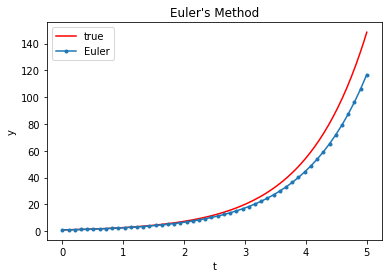

In [3]:
def f(t,y):
  k = 1
  return k*y   # returns derivative of y

t = np.linspace(0, 5, num=50)
y0 = 1
y = euler(f,t,y0)

# Exact
tsol = np.linspace(0,5,200)
k=1
ysol = np.exp(k*tsol)

plt.plot(tsol, ysol, 'r-',label='true')
plt.plot(t,y,'.-',label='Euler')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title('Euler\'s Method')
plt.show()

# EXAMPLE 2 - Radiative Cooling 
From https://nm.mathforcollege.com/mws/gen/08ode/mws_gen_ode_txt_euler.pdf 



Temp at t=480 s is 642.9407384340227


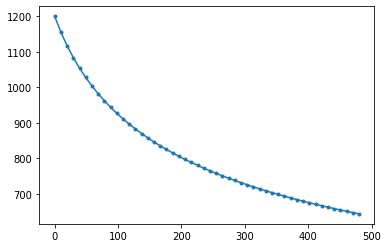

In [4]:
# Define derivative function
def f(t,y):
  k = 2.2067e-12
  a = 81e8
  return -k*(y**4 - a)

t = np.linspace(0, 480, 50)
y = euler(f,t,1200)
plt.plot(t,y,'.-')
print('Temp at t=480 s is',y[-1])